In [111]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
%matplotlib inline

In [112]:
df = pd.read_csv('train.csv')

In [113]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,...,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,...,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,...,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,...,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing data and Handling missing data

In [115]:
# from the data dictionary we get to know that the NA value for some variables means that feature is not present in the house so we will replace NA with no feature.

df['Alley'] = df['Alley'].fillna('No_Alley')
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df['BsmtFinType1']= df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2']= df['BsmtFinType2'].fillna('No_Basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_fireplace')
df['GarageType'] = df['GarageType'].fillna('No_garage') 
df['GarageFinish'] = df['GarageFinish'].fillna('No_garage')
df['GarageQual'] = df['GarageQual'].fillna('No_garage')
df['GarageCond'] = df['GarageCond'].fillna('No_garage')
df['MiscFeature'] = df['MiscFeature'].fillna('No_miscfeature')
df['Fence'] = df['Fence'].fillna('No_fence')
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')

In [116]:
df[df['GarageType']=='No_garage'].GarageYrBlt.isna().sum()

81

In [117]:
df.GarageYrBlt.isna().sum()

81

In [118]:
# replacing missing 'NAN' in GarageYrBlt, MasVnrType, MasVnrArea if there is no such feature
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [119]:
missing = df.isna().sum()/len(df)*100

In [120]:
miss = pd.DataFrame(missing.round(2).sort_values(ascending= False),columns=['missing'])

In [121]:
miss[miss['missing']>0]

,missing
LotFrontage,17.74
Electrical,0.07


### Converitng the year built into age 

In [122]:
df['Age'] = 2020-df['YearBuilt']

In [123]:
newdf = df.drop(columns=['YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1)

In [124]:
newdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,No_fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Pool,No_fence,No_miscfeature,0,2,2008,WD,Normal,208500,17
1,2,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,...,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Pool,No_fence,No_miscfeature,0,5,2007,WD,Normal,181500,44
2,3,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Pool,No_fence,No_miscfeature,0,9,2008,WD,Normal,223500,19
3,4,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,...,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_fence,No_miscfeature,0,2,2006,WD,Abnorml,140000,105
4,5,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Pool,No_fence,No_miscfeature,0,12,2008,WD,Normal,250000,20


### Checking for skewness and Bias in categorical values

In [125]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Age                int64
Length: 82, dtype: object

In [126]:
for c in newdf.columns:
    if newdf[c].dtypes == np.object:
        print(c)
        print(newdf[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley
No_Alley    0.937671
Grvl        0.034247
Pave        0.028082
Name: Alley, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050

In [127]:
# removing the categorical columns with morethan 80% bias
newdf = newdf.drop(['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],axis=1)

In [128]:
newdf.shape

(1460, 55)

## Missing Value treatment

In [129]:
# for LotFrontage value
newdf['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [130]:
newdf.LotFrontage.fillna(newdf.LotFrontage.median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [131]:
newdf.LotFrontage = newdf.LotFrontage.fillna(newdf.LotFrontage.median())

### Data Exploration

In [132]:
numeric = df.select_dtypes(include=['float','int64'])

In [133]:
numeric = numeric.drop(['Id'],axis=1)

In [134]:
corr = numeric.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.027850
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.192411,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.105237,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.123349
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014228
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572323
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.375983
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-1.000000
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.592855
MasVnrArea,0.023573,0.192411,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.311600
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.249503
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.02999

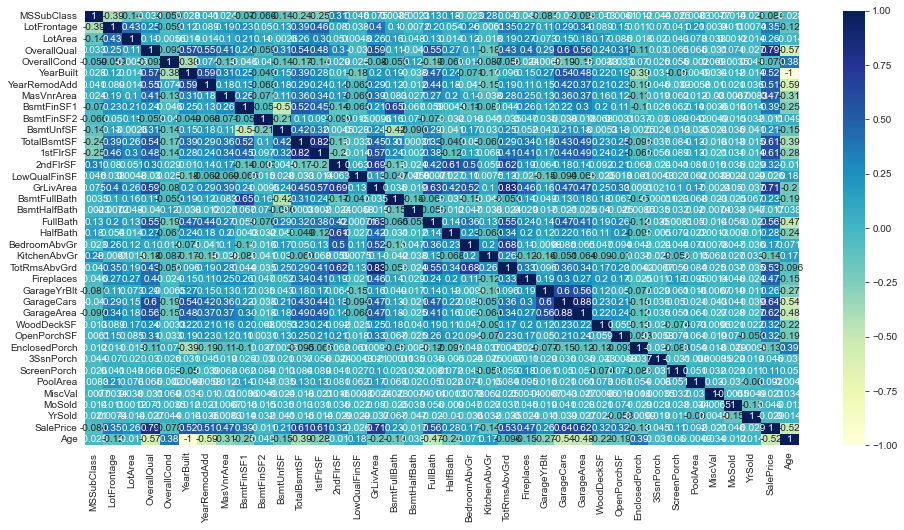

In [135]:
# plotting the figure
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

In [136]:
# checking for skewness in dependent variable i.e saleprice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

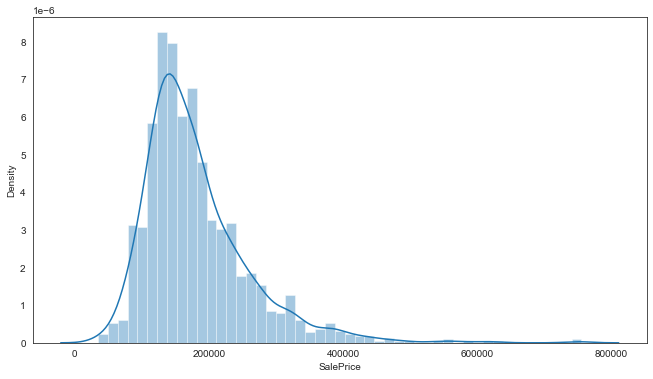

In [137]:
plt.figure(figsize=(11,6))
sns.distplot(newdf['SalePrice'])


We can see that the SalePrice is skewed and is positively skewed. Therefore we have to do transform to normalize it. We will use log transfromation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

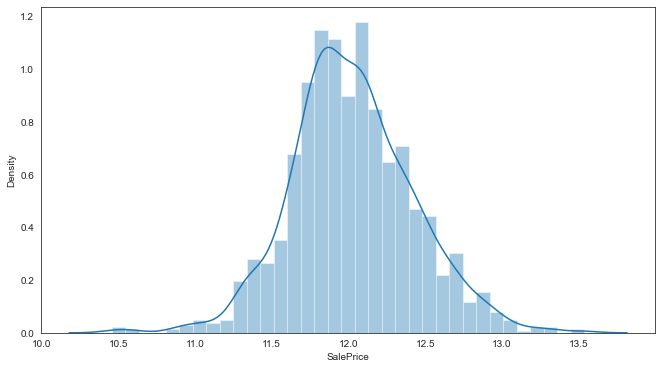

In [138]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(newdf['SalePrice']))

In [139]:
# Converting the categorical variables into dummy
catvalues = newdf.select_dtypes(include=['object'])
catvalues.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,No_fireplace,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [140]:
newdf_dummies = pd.get_dummies(catvalues,drop_first=True)
newdf_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,...,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [141]:
# droping the ID column
newdf = newdf.drop(['Id'], axis = 1)

In [142]:
# Droping the original categorical column
newdf = newdf.drop(list(catvalues.columns),axis = 1)

In [143]:
newdf = pd.concat([newdf,newdf_dummies], axis = 1)

In [144]:
newdf.shape

(1460, 157)

In [145]:
newdf['Log_SalePrice'] = np.log(newdf.SalePrice)

In [146]:
### Train test split 
dfnew_train, dfnew_test = train_test_split(newdf,train_size = .7, test_size= .3, random_state=100)

In [147]:
y_train = dfnew_train['Log_SalePrice']
X_train = dfnew_train.drop(columns = ['Log_SalePrice','SalePrice'], axis = 1)

y_test = dfnew_test['Log_SalePrice']
X_test = dfnew_test.drop(columns = ['Log_SalePrice','SalePrice'], axis = 1)

In [148]:
num_value = X_train.select_dtypes(include = ['int64','float64']).columns
num_value

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Age'],
      dtype='object')

In [149]:
## Scaling the data
scaler = StandardScaler()
X_train[num_value] = scaler.fit_transform(X_train[num_value])
X_test[num_value]  = scaler.transform(X_test[num_value])

### Model Building

In [150]:
## Building linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [151]:
y_train_predict = lm.predict(X_train)

In [152]:
r2_score(y_train,y_train_predict)

0.891314701637492

In [153]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.891314701637492
-8.450330777090659e+19
17.44314723917754
6.090032639140744e+21
0.017084375356687113
1.390418410762727e+19


In [154]:
# Calculating the RFE
rfe = RFE(lm,n_features_to_select=50)
rfe= rfe.fit(X_train, y_train)

In [155]:
cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No_Basement', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_No_Basement', 'BsmtFin

### Creating new test and train data set with top 50 variables derived using RFE

In [156]:
X_new_train = X_train[cols]
X_new_test = X_test[cols]

In [157]:
X_new_train.shape

(1021, 50)

In [158]:
X_new_test.shape

(438, 50)

In [159]:
## Linearregression

In [160]:
lm = LinearRegression()
lm.fit(X_new_train,y_train)

LinearRegression()

In [161]:
y_pred_test = lm.predict(X_new_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.891314701637492
-5.960690404180698e+19
17.44314723917754
4.2957843983678224e+21
0.017084375356687113
9.807726936912837e+18


### We can see that the linear regression model is not performing well

## Ridge regression with top 50 features

In [162]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit (X_new_train, y_train)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:

ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,5.0,-0.102704,-0.108854,1
18,6.0,-0.102950,-0.108857,2
16,4.0,-0.102451,-0.108860,3
19,7.0,-0.103185,-0.108888,4
15,3.0,-0.102169,-0.108913,5
20,8.0,-0.103401,-0.108949,6
21,9.0,-0.103608,-0.109013,7
14,2.0,-0.101844,-0.109021,8
22,10.0,-0.103799,-0.109088,9
13,1.0,-0.101441,-0.109262,10


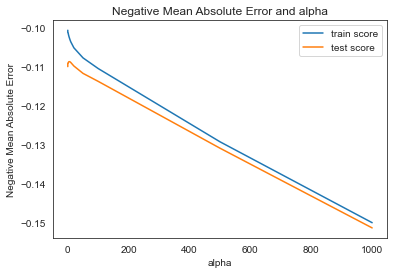

In [164]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [165]:
##Finding the best estimator for alpha (lambda parameter)
model_cv.best_estimator_

Ridge(alpha=5.0)

In [166]:
##Checking the coefficient values with lambda (alpha) = 5

ridge = Ridge(alpha=5)

ridge.fit(X_new_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  11.913281533677063
Coefficients:
 [ 0.13620877  0.00472587  0.00125397 -0.00129217  0.00398946  0.05934004
  0.0374471  -0.00708998  0.07439002  0.09774114  0.08585411  0.18851384
  0.04429553 -0.09070484 -0.09953738  0.11324442  0.10350634 -0.10878336
 -0.08864277 -0.04516077  0.10622324  0.11224994  0.13707642  0.05744977
  0.09030901 -0.01015086 -0.06600806  0.06942201 -0.02368369  0.01179503
 -0.01015086 -0.038476    0.03706186 -0.02368369  0.0783593   0.
  0.03908676  0.09966874  0.05963535 -0.11879571 -0.0587683  -0.12000246
 -0.11661619  0.07819248 -0.12000246 -0.07064324 -0.02854136 -0.08986814
 -0.05807928 -0.05807928]


## Model prediction and evaluation matrix

In [167]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_new_train)
y_pred_test_r = ridge.predict(X_new_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=5.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=5.0):
 ****************************************

For Train Set:
R2 score: 0.8575058224401634 
MSE score: 0.022398834545725915 
MAE score: 0.10325561811480909 
RMSE score: 0.14966240191085373

For Test Set:
R2 score: 0.8437370414633932 
MSE score: 0.02571152540662488 
MAE score: 0.1110145153480626 
RMSE score: 0.16034813814517734 
 ****************************************


In [168]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_new_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10
top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients
top10_ridge_df

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,MSZoning_RL,0.1885,0.1885
1,Neighborhood_Somerst,0.1371,0.1371
2,OverallQual,0.1362,0.1362
3,BsmtQual_No_Basement,-0.1200,0.1200
4,BsmtFinType1_No_Basement,-0.1200,0.1200
5,BsmtQual_Fa,-0.1188,0.1188
6,BsmtQual_TA,-0.1166,0.1166
7,Neighborhood_ClearCr,0.1132,0.1132
8,Neighborhood_NridgHt,0.1122,0.1122
9,Neighborhood_Edwards,-0.1088,0.1088


In [174]:
ridge_df[ridge_df['Coefficient'] != 0].shape

(49, 3)

## We can see that ridge has given 49 features out of 50 variables

### Checking for assumption of linearity

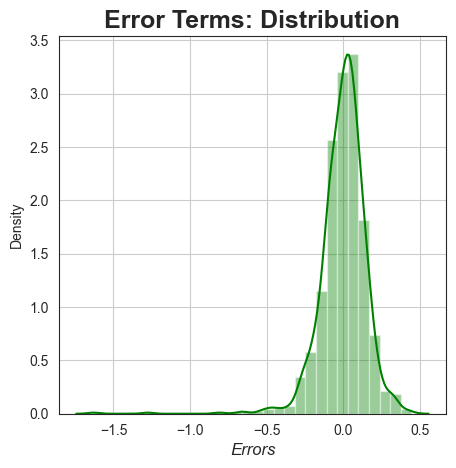

In [175]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

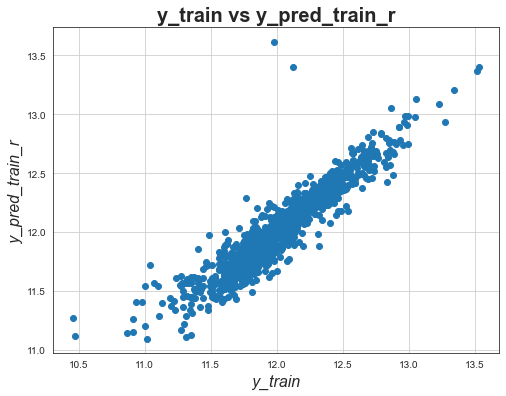

In [176]:
 #Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

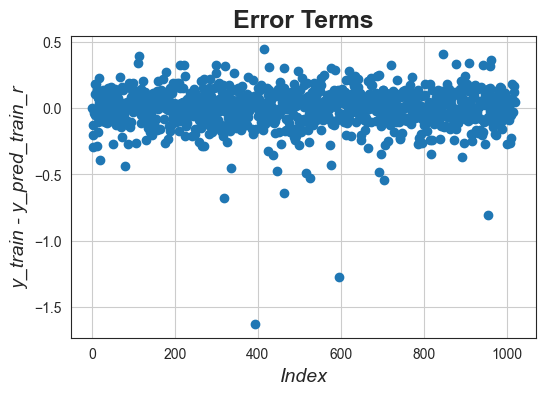

In [177]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,1021,1)] #For 966 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

### For Test set:

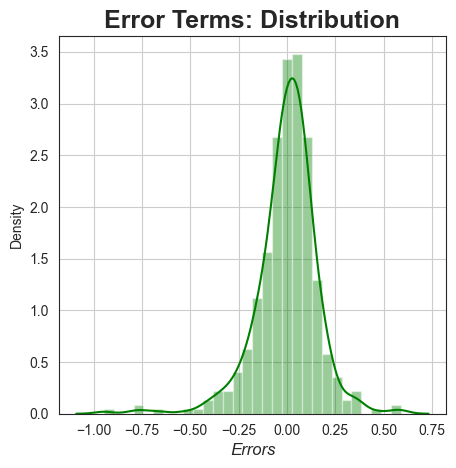

In [178]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

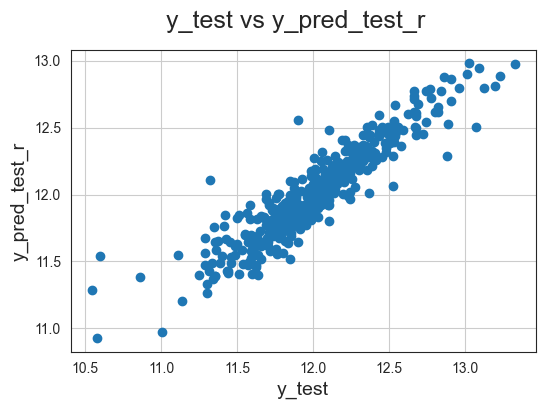

In [179]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()


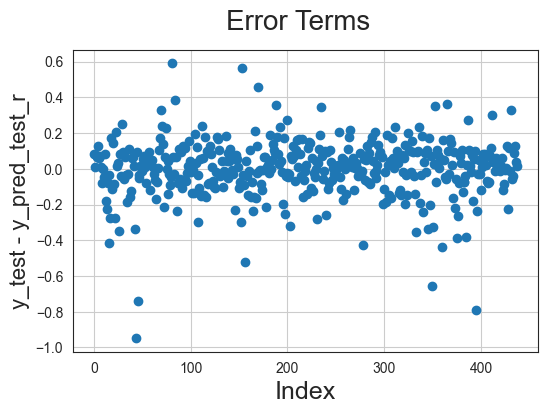

In [180]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,438,1)] #For 415 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

In [181]:
# printing best model param
print(model_cv.best_params_)

{'alpha': 5.0}


### optimal value of alpha is 5

In [182]:
# fitting ridge with alpha = 5
alpha = 5
ridge =Ridge(alpha=alpha)
ridge.fit(X_new_train, y_train)
print(ridge.coef_)

[ 0.13620877  0.00472587  0.00125397 -0.00129217  0.00398946  0.05934004
  0.0374471  -0.00708998  0.07439002  0.09774114  0.08585411  0.18851384
  0.04429553 -0.09070484 -0.09953738  0.11324442  0.10350634 -0.10878336
 -0.08864277 -0.04516077  0.10622324  0.11224994  0.13707642  0.05744977
  0.09030901 -0.01015086 -0.06600806  0.06942201 -0.02368369  0.01179503
 -0.01015086 -0.038476    0.03706186 -0.02368369  0.0783593   0.
  0.03908676  0.09966874  0.05963535 -0.11879571 -0.0587683  -0.12000246
 -0.11661619  0.07819248 -0.12000246 -0.07064324 -0.02854136 -0.08986814
 -0.05807928 -0.05807928]


In [183]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_new_train)
y_pred_test_r = ridge.predict(X_new_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=5.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=5.0):
 ****************************************

For Train Set:
R2 score: 0.8575058224401634 
MSE score: 0.022398834545725915 
MAE score: 0.10325561811480909 
RMSE score: 0.14966240191085373

For Test Set:
R2 score: 0.8437370414633932 
MSE score: 0.02571152540662488 
MAE score: 0.1110145153480626 
RMSE score: 0.16034813814517734 
 ****************************************


In [184]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_new_train.columns, 'Coefficient':ridge.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(ridge.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#lasso df
ridge_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSZoning_RL,0.1885,0.1885
1,Neighborhood_Somerst,0.1371,0.1371
2,OverallQual,0.1362,0.1362
3,BsmtQual_No_Basement,-0.1200,0.1200
4,BsmtFinType1_No_Basement,-0.1200,0.1200
5,BsmtQual_Fa,-0.1188,0.1188
6,BsmtQual_TA,-0.1166,0.1166
7,Neighborhood_ClearCr,0.1132,0.1132
8,Neighborhood_NridgHt,0.1122,0.1122
9,Neighborhood_Edwards,-0.1088,0.1088


# Lasso

In [185]:
lasso = Lasso()
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_new_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.101110,-0.109600,1
1,0.001,-0.105487,-0.111312,2
2,0.01,-0.121028,-0.124112,3
3,0.05,-0.147129,-0.148613,4
4,0.1,-0.171406,-0.172379,5
5,0.2,-0.233914,-0.234912,6
6,0.3,-0.295690,-0.296429,7
25,100,-0.310053,-0.310647,8
24,50,-0.310053,-0.310647,8
23,20,-0.310053,-0.310647,8


In [187]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [188]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.001,-0.084228,-0.094486,1
9,0.0009,-0.083866,-0.094530,2
8,0.0008,-0.083462,-0.094568,3
7,0.0007,-0.083061,-0.094627,4
11,0.002,-0.086923,-0.094664,5
3,0.0003,-0.080808,-0.094712,6
6,0.0006,-0.082610,-0.094715,7
4,0.0004,-0.081473,-0.094740,8
5,0.0005,-0.082105,-0.094767,9
2,0.0002,-0.079954,-0.095059,10


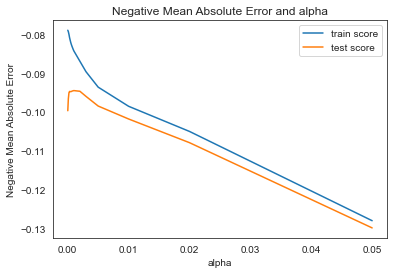

In [189]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [190]:
# get the best estimator for lambda

model_cv.best_estimator_

Lasso(alpha=0.0001)

In [191]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [192]:
alpha = .0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_new_train, y_train)
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  11.689265320164585
Coefficients:
  [ 1.22859631e-01  0.00000000e+00 -6.70220866e-04 -3.68093288e-03
 -3.34973300e-03  7.75682219e-02  5.26722564e-02 -3.62610431e-03
  5.53189095e-02  3.46733159e-01  3.67153745e-01  4.45828577e-01
  3.07211426e-01 -1.13632433e-01 -1.42334491e-01  1.39722137e-01
  1.16451223e-01 -1.14713568e-01 -1.78007574e-01 -8.48709027e-02
  1.39105361e-01  1.26549854e-01  1.57410974e-01  8.27313903e-02
  1.27926788e-01 -0.00000000e+00 -2.08322569e-01  8.65285748e-02
 -7.76802188e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.24356238e-02 -9.26329750e-06  1.06437897e-01  0.00000000e+00
  4.24778819e-02  1.02569962e-01  1.36110755e-01 -1.92791928e-01
 -9.24673846e-02 -2.70482760e-01 -1.57255284e-01  7.85953263e-02
 -6.24632565e-02 -7.45900494e-02 -8.34541348e-02 -8.92478157e-02
 -1.17261337e-01 -0.00000000e+00]


In [193]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_new_train)
y_pred_test_l = lasso.predict(X_new_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.0001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.0001):
 ****************************************

For Train Set:
R2 score: 0.864577160244847 
MSE score: 0.021287282282914807 
MAE score: 0.10219803451255297 
RMSE score: 0.1459016185068377

For Test Set:
R2 score: 0.845239146517341 
MSE score: 0.025464368866011014 
MAE score: 0.11185546806768135 
RMSE score: 0.1595755898187784 
 ****************************************


In [194]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_new_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,MSZoning_RL,0.4458,0.4458
1,MSZoning_RH,0.3672,0.3672
2,MSZoning_FV,0.3467,0.3467
3,MSZoning_RM,0.3072,0.3072
4,BsmtQual_No_Basement,-0.2705,0.2705
5,Exterior1st_BrkComm,-0.2083,0.2083
6,BsmtQual_Fa,-0.1928,0.1928
7,Neighborhood_MeadowV,-0.1780,0.1780
8,Neighborhood_Somerst,0.1574,0.1574
9,BsmtQual_TA,-0.1573,0.1573


In [198]:
lasso_df[lasso_df['Coefficient'] !=0].shape

(42, 3)

### There are 42 features which lasso identified from 50 features

In [200]:
top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['MSZoning_RL',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_RM',
 'BsmtQual_No_Basement']

## Residual analysis of model

We will check for error distribution, which should be normally distributed

In [201]:
## for Train set

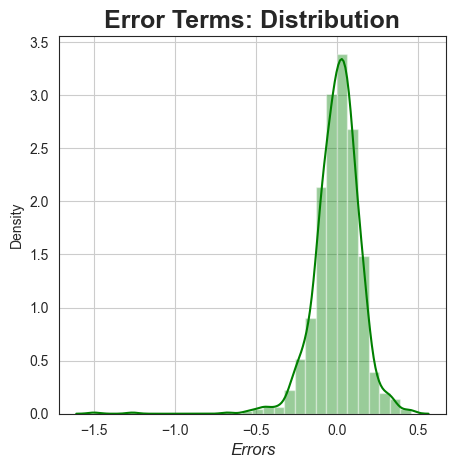

In [202]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

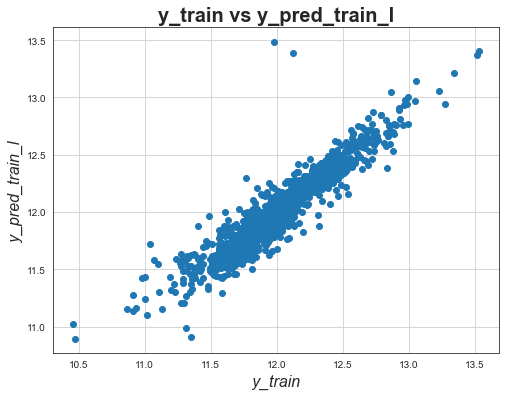

In [203]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

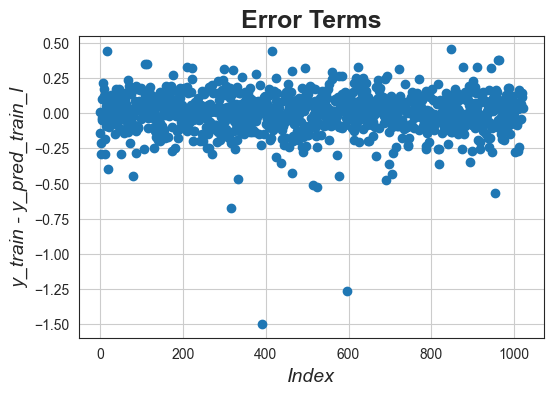

In [204]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,1021,1)] #For 1021 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

## For Test set

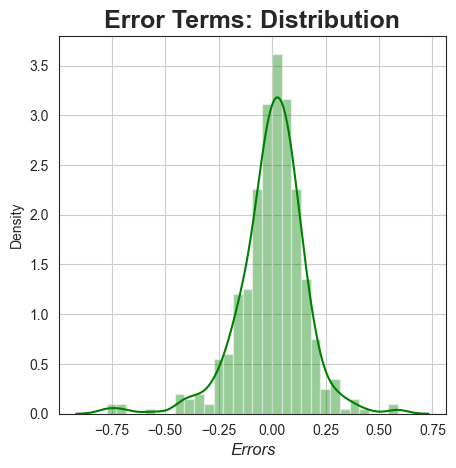

In [205]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()


Error terms are normally distributed with mean as 0

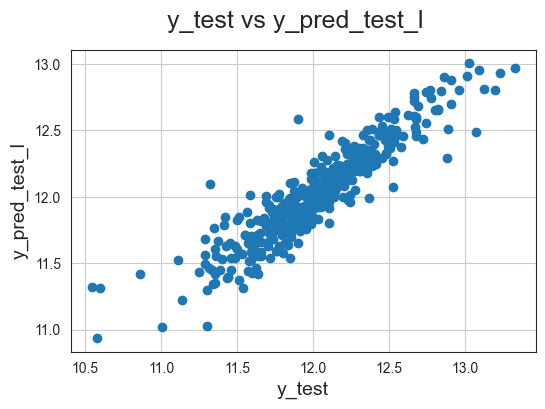

In [206]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [207]:
y_test.shape

(438,)

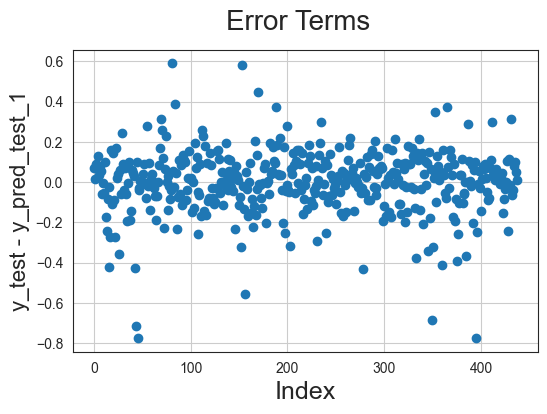

In [208]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,438,1)] #For 438 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()


The residuals are scattered along (y=0) and are independent of each other.

## Question 1 

In [209]:
### Question one doubling the alpha for lasso and ridge
# ridge
 # alpha = 5
alpha = 10
ridge =Ridge(alpha=alpha)
ridge.fit(X_new_train, y_train)
#print(ridge.coef_)

##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_new_train)
y_pred_test_r = ridge.predict(X_new_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=10.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=10.0):
 ****************************************

For Train Set:
R2 score: 0.8528505307575084 
MSE score: 0.023130605555233285 
MAE score: 0.10399995187556314 
RMSE score: 0.15208749309273686

For Test Set:
R2 score: 0.8431548075895753 
MSE score: 0.025807326236069454 
MAE score: 0.11119357554691385 
RMSE score: 0.16064658800008624 
 ****************************************


In [210]:
model_parameter = list(ridge.coef_)
cols = X_new_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,OverallQual,0.142873
11,MSZoning_RL,0.139856
22,Neighborhood_Somerst,0.113342
21,Neighborhood_NridgHt,0.100252
37,Exterior2nd_VinylSd,0.095605
15,Neighborhood_ClearCr,0.092407
16,Neighborhood_Crawfor,0.089869
20,Neighborhood_NoRidge,0.085330
43,BsmtExposure_Gd,0.075197
8,GrLivArea,0.073357


In [211]:
# Lasso doubling the alpha for lasso
alpha = .0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_new_train, y_train)


##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_new_train)
y_pred_test_l = lasso.predict(X_new_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Model: alpha=0.0002):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Model: alpha=0.0002):
 ****************************************

For Train Set:
R2 score: 0.8632562182596544 
MSE score: 0.021494922773758068 
MAE score: 0.10232329106517521 
RMSE score: 0.1466114687661169

For Test Set:
R2 score: 0.8457032852950197 
MSE score: 0.025387999417446582 
MAE score: 0.11137280664729997 
RMSE score: 0.1593361208811316 
 ****************************************


In [212]:
model_parameter = list(ridge.coef_)
cols = X_new_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,OverallQual,0.142873
11,MSZoning_RL,0.139856
22,Neighborhood_Somerst,0.113342
21,Neighborhood_NridgHt,0.100252
37,Exterior2nd_VinylSd,0.095605
15,Neighborhood_ClearCr,0.092407
16,Neighborhood_Crawfor,0.089869
20,Neighborhood_NoRidge,0.085330
43,BsmtExposure_Gd,0.075197
8,GrLivArea,0.073357


In [213]:
model_parameter = list(lasso.coef_)
#model_parameter.insert(0,lasso.intercept_)
cols = X_new_train.columns
#cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
11,MSZoning_RL,0.383357
10,MSZoning_RH,0.296805
9,MSZoning_FV,0.282966
12,MSZoning_RM,0.242095
22,Neighborhood_Somerst,0.155352
15,Neighborhood_ClearCr,0.134039
20,Neighborhood_NoRidge,0.130738
0,OverallQual,0.126590
21,Neighborhood_NridgHt,0.122722
24,Neighborhood_Veenker,0.118654


In [214]:
lasso_coef[lasso_coef['Coef'] != 0].shape

(39, 2)

In [215]:
['MSZoning_RL',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_RM',
 'BsmtQual_No_Basement']

['MSZoning_RL',
 'MSZoning_RH',
 'MSZoning_FV',
 'MSZoning_RM',
 'BsmtQual_No_Basement']

In [216]:
## Question 3 Droping the Top 5 feature and rebuild lasso

In [217]:
newdf_3 = newdf.drop(['MSZoning_RL','MSZoning_RH','MSZoning_FV','MSZoning_RM','BsmtQual_No_Basement'],axis=1)
newdf_3['Log_SalePrice'] = np.log(newdf_3.SalePrice)
### Train test split 
dfnew_train, dfnew_test = train_test_split(newdf_3,train_size = .7, test_size= .3, random_state=100)
y_train = dfnew_train['Log_SalePrice']
X_train = dfnew_train.drop(columns = ['Log_SalePrice','SalePrice'], axis = 1)

y_test = dfnew_test['Log_SalePrice']
X_test = dfnew_test.drop(columns = ['Log_SalePrice','SalePrice'], axis = 1)

num_value = X_train.select_dtypes(include = ['int64','float64']).columns
num_value

## Scaling the data
scaler = StandardScaler()
X_train[num_value] = scaler.fit_transform(X_train[num_value])
X_test[num_value]  = scaler.transform(X_test[num_value])


lm = LinearRegression()
lm.fit(X_train,y_train)
# Calculating the RFE
rfe = RFE(lm,n_features_to_select=50)
rfe= rfe.fit(X_train, y_train)

cols = X_train.columns[rfe.support_]
cols

X_new_train = X_train[cols]
X_new_test = X_test[cols]

In [218]:
X_new_train.shape

(1021, 50)

In [219]:

lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_new_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [221]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_new_train, y_train) 

Lasso(alpha=0.0001)

In [222]:
lasso.coef_

array([ 0.11944611,  0.00861592,  0.00264467, -0.01895808,  0.        ,
        0.08763884,  0.05077748, -0.00806315,  0.05509273, -0.10355108,
       -0.29158216,  0.15354208,  0.12317152, -0.10627349, -0.20900924,
       -0.25311876,  0.14041769,  0.12987031, -0.14397092,  0.09745081,
        0.07231612,  0.12978084,  0.        , -0.14612972,  0.1746817 ,
        0.        ,  0.12736642,  0.02476711,  0.09725977,  0.12181686,
        0.18567241,  0.05189857,  0.08728777,  0.        ,  0.        ,
        0.16948099,  0.        ,  0.10730818,  0.        ,  0.08680556,
       -0.15850192, -0.        , -0.22662838, -0.07509883, -0.14951399,
       -0.03939543, -0.08838191, -0.07969839, -0.103808  , -0.        ])

In [223]:
y_pred_train = lasso.predict(X_new_train)
y_pred_test = lasso.predict(X_new_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8571048086235751
0.8420184468488476


In [224]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_new_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Neighborhood_BrDale,-0.2916,0.2916
1,Neighborhood_MeadowV,-0.2531,0.2531
2,KitchenQual_Fa,-0.2266,0.2266
3,Neighborhood_IDOTRR,-0.2090,0.2090
4,Exterior1st_VinylSd,0.1857,0.1857
5,Exterior1st_BrkFace,0.1747,0.1747
6,Exterior2nd_CmentBd,0.1695,0.1695
7,BsmtFinType1_No_Basement,-0.1585,0.1585
8,Neighborhood_ClearCr,0.1535,0.1535
9,KitchenQual_TA,-0.1495,0.1495


In [225]:
list(lasso_df.iloc[:5,0])

['Neighborhood_BrDale',
 'Neighborhood_MeadowV',
 'KitchenQual_Fa',
 'Neighborhood_IDOTRR',
 'Exterior1st_VinylSd']

Next Top 5 Feature are 
- Neighborhood_BrDale
- Neighborhood_MeadowV
- KitchenQual_Fa
- Neighborhood_IDOTRR
- Exterior1st_VinylSd